In [131]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
sns.set()

# Column 2 -> Throughput
# Column 4 -> Latency

In [257]:
# WORKLOAD A
mean_data = []
median_data = []
std_data = []
for i in [10,20,30,40,50,60,70,80,100,120]:
    df = pd.read_csv('../results/ycsb/4-nodes/6-clients/couchbase2/workloada_couchbase_custom/results-' + str(i) + '.csv', sep = ';', header=None)
    df_val1 = pd.read_csv('../results/ycsb/4-nodes/6-clients/couchbase2/workloada_couchbase_custom-validation/results-' + str(i) + '.csv', sep = ';', header=None)
    df_val2 = pd.read_csv('../results/ycsb/4-nodes/6-clients/couchbase2/workloada_couchbase_custom-validation2/results-' + str(i) + '.csv', sep = ';', header=None)

    means = (df.groupby(3).mean() + df_val1.groupby(3).mean() + df_val2.groupby(3).mean()) / 3
    means = means.drop(index='CLEANUP')
    throughput_weighted_average = ((means / means.sum()[1])[1].values * means[2].values).mean()
    latency_weighted_average = ((means / means.sum()[1])[1].values * means[4].values).mean()
    mean_data.append([i, throughput_weighted_average, latency_weighted_average])
    
    medians = (df.groupby(3).median() + df_val1.groupby(3).median() + df_val2.groupby(3).median()) / 3
    medians = medians.drop(index='CLEANUP')
    throughput_weighted_average = ((medians / medians.sum()[1])[1].values * medians[2].values).mean()
    latency_weighted_average = ((medians / medians.sum()[1])[1].values * medians[4].values).mean()
    median_data.append([i, throughput_weighted_average, latency_weighted_average])
    
    stds = (df.groupby(3).std() + df_val1.groupby(3).std() + df_val2.groupby(3).std()) / 3
    stds = stds.drop(index='CLEANUP')
    throughput_weighted_average = ((stds / stds.sum()[1])[1].values * stds[2].values).mean()
    latency_weighted_average = ((stds / stds.sum()[1])[1].values * stds[4].values).mean()
    std_data.append([i, throughput_weighted_average, latency_weighted_average])

,Threads,Throughput,Latency
0,10,720.643060,4373.075615
1,20,913.396937,7738.865196
2,30,1005.379664,17140.923050
3,40,1034.942722,14262.107825
4,50,1096.645715,16775.494699
5,60,1126.230573,25018.012060
6,70,1256.387562,20867.936621
7,80,1186.819048,39921.786019
8,100,1331.461978,36613.731663
9,120,1384.757982,41114.890886


,Threads,Throughput,Latency
0,10,736.080833,3035.361667
1,20,931.772500,4610.095833
2,30,1052.985292,6270.863605
3,40,1104.845833,7791.697083
4,50,1156.948333,8929.105417
5,60,1207.958333,10832.290417
6,70,1340.231667,11602.910417
7,80,1221.853333,13608.627917
8,100,1369.260000,16166.955000
9,120,1475.013333,17579.285833


,Threads,Throughput,Latency
0,10,202.081759,11108.083473
1,20,270.942367,22815.388160
2,30,294.802085,74556.651540
3,40,354.916606,40604.307336
4,50,336.263971,49033.051059
5,60,341.096130,88439.459621
6,70,342.578276,60069.958545
7,80,390.610526,151173.451740
8,100,379.085870,126698.446903
9,120,475.086372,138896.051702


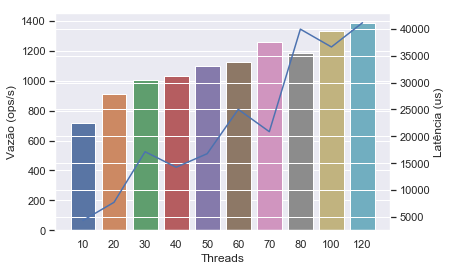

In [259]:
# Geração de gráfico

mean_df = pd.DataFrame(mean_data, columns = ['Threads', 'Throughput', 'Latency']) 
median_df = pd.DataFrame(median_data, columns = ['Threads', 'Throughput', 'Latency']) 
std_df = pd.DataFrame(std_data, columns = ['Threads', 'Throughput', 'Latency']) 
display(mean_df)
display(median_df)
display(std_df)
ax = sns.barplot(x="Threads", y="Throughput", data=mean_df)
ax.set(xlabel='Threads', ylabel='Vazão (ops/s)')
ax2 = plt.twinx()
ax2.set(ylabel="Latência (us)")
fig = sns.lineplot(data=mean_df.Latency, ax=ax2)

In [229]:
# WORKLOAD B
mean_data = []
median_data = []
std_data = []
for i in [10,20,30,40,50,60,70,80,100,120]:
    df = pd.read_csv('../results/ycsb/4-nodes/6-clients/couchbase2/workloadb_couchbase_custom/results-' + str(i) + '.csv', sep = ';', header=None)
    df_val1 = pd.read_csv('../results/ycsb/4-nodes/6-clients/couchbase2/workloadb_couchbase_custom-validation/results-' + str(i) + '.csv', sep = ';', header=None)
    df_val2 = pd.read_csv('../results/ycsb/4-nodes/6-clients/couchbase2/workloadb_couchbase_custom-validation2/results-' + str(i) + '.csv', sep = ';', header=None)

    means = (df.groupby(3).mean() + df_val1.groupby(3).mean() + df_val2.groupby(3).mean()) / 3
    means = means.drop(index='CLEANUP')
    throughput_weighted_average = ((means / means.sum()[1])[1].values * means[2].values).mean()
    latency_weighted_average = ((means / means.sum()[1])[1].values * means[4].values).mean()
    mean_data.append([i, throughput_weighted_average, latency_weighted_average])
    
    medians = (df.groupby(3).median() + df_val1.groupby(3).median() + df_val2.groupby(3).median()) / 3
    medians = medians.drop(index='CLEANUP')
    throughput_weighted_average = ((medians / medians.sum()[1])[1].values * medians[2].values).mean()
    latency_weighted_average = ((medians / medians.sum()[1])[1].values * medians[4].values).mean()
    median_data.append([i, throughput_weighted_average, latency_weighted_average])
    
    stds = (df.groupby(3).std() + df_val1.groupby(3).std() + df_val2.groupby(3).std()) / 3
    stds = stds.drop(index='CLEANUP')
    throughput_weighted_average = ((stds / stds.sum()[1])[1].values * stds[2].values).mean()
    latency_weighted_average = ((stds / stds.sum()[1])[1].values * stds[4].values).mean()
    std_data.append([i, throughput_weighted_average, latency_weighted_average])

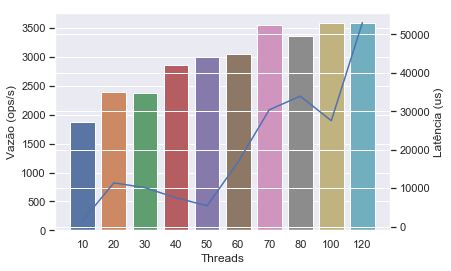

In [230]:
# Geração de gráfico

mean_df = pd.DataFrame(mean_data, columns = ['Threads', 'Throughput', 'Latency']) 
median_df = pd.DataFrame(median_data, columns = ['Threads', 'Throughput', 'Latency']) 
std_df = pd.DataFrame(std_data, columns = ['Threads', 'Throughput', 'Latency']) 
display(mean_df)
display(median_df)
display(std_df)
ax = sns.barplot(x="Threads", y="Throughput", data=mean_df)
ax.set(xlabel='Threads', ylabel='Vazão (ops/s)')
ax2 = plt.twinx()
ax2.set(ylabel="Latência (us)")
fig = sns.lineplot(data=mean_df.Latency, ax=ax2)

In [249]:
# WORKLOAD C
mean_data = []
median_data = []
std_data = []
for i in [10,20,30,40,50,60,70,80,100,120]:
    df = pd.read_csv('../results/ycsb/4-nodes/6-clients/couchbase2/workloadc_couchbase_custom/results-' + str(i) + '.csv', sep = ';', header=None)
    df_val1 = pd.read_csv('../results/ycsb/4-nodes/6-clients/couchbase2/workloadc_couchbase_custom-validation/results-' + str(i) + '.csv', sep = ';', header=None)
    df_val2 = pd.read_csv('../results/ycsb/4-nodes/6-clients/couchbase2/workloadc_couchbase_custom-validation2/results-' + str(i) + '.csv', sep = ';', header=None)

    means = (df.groupby(3).mean() + df_val1.groupby(3).mean() + df_val2.groupby(3).mean()) / 3
    means = means.drop(index='CLEANUP')
    if (i == 70):
        means = means.drop(index='SCAN-FAILED')
    throughput_weighted_average = ((means / means.sum()[1])[1].values * means[2].values).mean()
    latency_weighted_average = ((means / means.sum()[1])[1].values * means[4].values).mean()
    mean_data.append([i, throughput_weighted_average, latency_weighted_average])
    medians = (df.groupby(3).median() + df_val1.groupby(3).median() + df_val2.groupby(3).median()) / 3
    medians = medians.drop(index='CLEANUP')
    throughput_weighted_average = ((medians / medians.sum()[1])[1].values * medians[2].values).mean()
    latency_weighted_average = ((medians / medians.sum()[1])[1].values * medians[4].values).mean()
    median_data.append([i, throughput_weighted_average, latency_weighted_average])
    
    stds = (df.groupby(3).std() + df_val1.groupby(3).std() + df_val2.groupby(3).std()) / 3
    stds = stds.drop(index='CLEANUP')
    throughput_weighted_average = ((stds / stds.sum()[1])[1].values * stds[2].values).mean()
    latency_weighted_average = ((stds / stds.sum()[1])[1].values * stds[4].values).mean()
    std_data.append([i, throughput_weighted_average, latency_weighted_average])

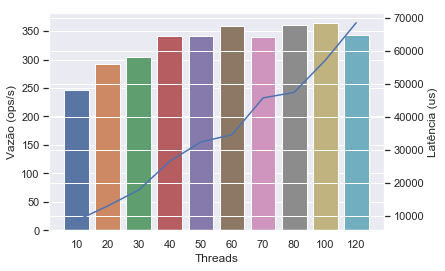

In [250]:
# Geração de gráfico

mean_df = pd.DataFrame(mean_data, columns = ['Threads', 'Throughput', 'Latency']) 
median_df = pd.DataFrame(median_data, columns = ['Threads', 'Throughput', 'Latency']) 
std_df = pd.DataFrame(std_data, columns = ['Threads', 'Throughput', 'Latency']) 
display(mean_df)
display(median_df)
display(std_df)
ax = sns.barplot(x="Threads", y="Throughput", data=mean_df)
ax.set(xlabel='Threads', ylabel='Vazão (ops/s)')
ax2 = plt.twinx()
ax2.set(ylabel="Latência (us)")
fig = sns.lineplot(data=mean_df.Latency, ax=ax2)

In [253]:
# WORKLOAD D
mean_data = []
median_data = []
std_data = []
for i in [10,20,30,40,50,60,70,80,100,120]:
    df = pd.read_csv('../results/ycsb/4-nodes/6-clients/couchbase2/workloadd_couchbase_custom/result-' + str(i) + '.csv', sep = ';', header=None)
    df_val1 = pd.read_csv('../results/ycsb/4-nodes/6-clients/couchbase2/workloadd_couchbase_custom-validation/result-' + str(i) + '.csv', sep = ';', header=None)
    df_val2 = pd.read_csv('../results/ycsb/4-nodes/6-clients/couchbase2/workloadd_couchbase_custom-validation2/result-' + str(i) + '.csv', sep = ';', header=None)

    means = (df.groupby(3).mean() + df_val1.groupby(3).mean() + df_val2.groupby(3).mean()) / 3
    means = means.drop(index='CLEANUP')
    throughput_weighted_average = ((means / means.sum()[1])[1].values * means[2].values).mean()
    latency_weighted_average = ((means / means.sum()[1])[1].values * means[4].values).mean()
    mean_data.append([i, throughput_weighted_average, latency_weighted_average])
    medians = (df.groupby(3).median() + df_val1.groupby(3).median() + df_val2.groupby(3).median()) / 3
    medians = medians.drop(index='CLEANUP')
    throughput_weighted_average = ((medians / medians.sum()[1])[1].values * medians[2].values).mean()
    latency_weighted_average = ((medians / medians.sum()[1])[1].values * medians[4].values).mean()
    median_data.append([i, throughput_weighted_average, latency_weighted_average])
    
    stds = (df.groupby(3).std() + df_val1.groupby(3).std() + df_val2.groupby(3).std()) / 3
    stds = stds.drop(index='CLEANUP')
    throughput_weighted_average = ((stds / stds.sum()[1])[1].values * stds[2].values).mean()
    latency_weighted_average = ((stds / stds.sum()[1])[1].values * stds[4].values).mean()
    std_data.append([i, throughput_weighted_average, latency_weighted_average])

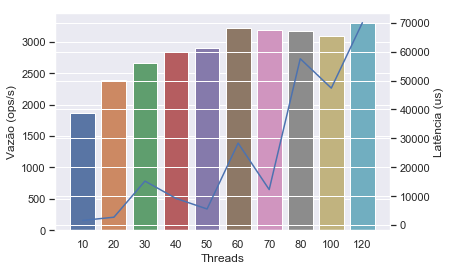

In [254]:
# Geração de gráfico

mean_df = pd.DataFrame(mean_data, columns = ['Threads', 'Throughput', 'Latency']) 
median_df = pd.DataFrame(median_data, columns = ['Threads', 'Throughput', 'Latency']) 
std_df = pd.DataFrame(std_data, columns = ['Threads', 'Throughput', 'Latency']) 
display(mean_df)
display(median_df)
display(std_df)
ax = sns.barplot(x="Threads", y="Throughput", data=mean_df)
ax.set(xlabel='Threads', ylabel='Vazão (ops/s)')
ax2 = plt.twinx()
ax2.set(ylabel="Latência (us)")
fig = sns.lineplot(data=mean_df.Latency, ax=ax2)

In [267]:
# QUERY 1
mean_data = []
median_data = []
std_data = []
for i in [10,20,30,40,50,60,70,80,100,120]:
    #df = pd.read_csv('../results/ycsb/4-nodes/6-clients/couchbase2/workloadq1_couchbase_custom/results-' + str(i) + '.csv', sep = ';', header=None)
    df_val1 = pd.read_csv('../results/ycsb/4-nodes/6-clients/couchbase2/workloadq1_couchbase_custom-validation/results-' + str(i) + '.csv', sep = ';', header=None)
    df_val2 = pd.read_csv('../results/ycsb/4-nodes/6-clients/couchbase2/workloadq1_couchbase_custom-validation2/results-' + str(i) + '.csv', sep = ';', header=None)

    means = (df_val1.groupby(3).mean() + df_val2.groupby(3).mean()) / 2
    means = means.drop(index='CLEANUP')
    throughput_weighted_average = ((means / means.sum()[1])[1].values * means[2].values).mean()
    latency_weighted_average = ((means / means.sum()[1])[1].values * means[4].values).mean()
    mean_data.append([i, throughput_weighted_average, latency_weighted_average])
    medians = (df_val1.groupby(3).median() + df_val2.groupby(3).median()) / 2
    medians = medians.drop(index='CLEANUP')
    throughput_weighted_average = ((medians / medians.sum()[1])[1].values * medians[2].values).mean()
    latency_weighted_average = ((medians / medians.sum()[1])[1].values * medians[4].values).mean()
    median_data.append([i, throughput_weighted_average, latency_weighted_average])
    
    stds = (df_val1.groupby(3).std() + df_val2.groupby(3).std()) / 2
    stds = stds.drop(index='CLEANUP')
    throughput_weighted_average = ((stds / stds.sum()[1])[1].values * stds[2].values).mean()
    latency_weighted_average = ((stds / stds.sum()[1])[1].values * stds[4].values).mean()
    std_data.append([i, throughput_weighted_average, latency_weighted_average])

,Threads,Throughput,Latency
0,10,1080.918754,20156.627292
1,20,1345.724774,20783.861395
2,30,1529.451979,32218.555642
3,40,1618.074194,54329.296129
4,50,1619.085597,92318.944100
5,60,1684.493609,67365.768990
6,70,1690.594662,115130.673099
7,80,1733.322667,105316.179260
8,100,1730.014310,142017.278362
9,120,1717.793329,178022.312952


,Threads,Throughput,Latency
0,10,1111.0000,8893.4500
1,20,1358.4350,14596.3800
2,30,1552.1925,19124.9750
3,40,1664.8350,23922.0950
4,50,1665.6650,30159.2100
5,60,1735.7650,34172.6850
6,70,1756.4350,39585.5725
7,80,1783.5000,44381.6600
8,100,1817.6525,54988.8100
9,120,1797.4100,65452.5500


,Threads,Throughput,Latency
0,10,183.771110,115173.586722
1,20,254.595752,54027.977625
2,30,253.391671,95298.413788
3,40,309.324452,223364.378717
4,50,353.341372,391895.602073
5,60,340.296520,230568.308817
6,70,411.272683,442929.320582
7,80,353.581554,431227.306263
8,100,398.257115,570424.813608
9,120,441.917769,480628.181373


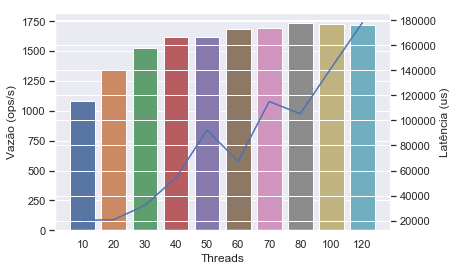

In [268]:
# Geração de gráfico

mean_df = pd.DataFrame(mean_data, columns = ['Threads', 'Throughput', 'Latency']) 
median_df = pd.DataFrame(median_data, columns = ['Threads', 'Throughput', 'Latency']) 
std_df = pd.DataFrame(std_data, columns = ['Threads', 'Throughput', 'Latency']) 
display(mean_df)
display(median_df)
display(std_df)
ax = sns.barplot(x="Threads", y="Throughput", data=mean_df)
ax.set(xlabel='Threads', ylabel='Vazão (ops/s)')
ax2 = plt.twinx()
ax2.set(ylabel="Latência (us)")
fig = sns.lineplot(data=mean_df.Latency, ax=ax2)

In [271]:
# QUERY 1
mean_data = []
median_data = []
std_data = []
for i in [10,20,30,40,50]:
    #df = pd.read_csv('../results/ycsb/4-nodes/6-clients/couchbase2/workloadq1_couchbase_custom/results-' + str(i) + '.csv', sep = ';', header=None)
    df_val1 = pd.read_csv('../results/ycsb/4-nodes/6-clients/couchbase2/workloadq1_couchbase_custom-validation/results-' + str(i) + '.csv', sep = ';', header=None)
    df_val2 = pd.read_csv('../results/ycsb/4-nodes/6-clients/couchbase2/workloadq1_couchbase_custom-validation2/results-' + str(i) + '.csv', sep = ';', header=None)

    means = (df_val1.groupby(3).mean() + df_val2.groupby(3).mean()) / 2
    means = means.drop(index='CLEANUP')
    throughput_weighted_average = ((means / means.sum()[1])[1].values * means[2].values).mean()
    latency_weighted_average = ((means / means.sum()[1])[1].values * means[4].values).mean()
    mean_data.append([i, throughput_weighted_average, latency_weighted_average])
    medians = (df_val1.groupby(3).median() + df_val2.groupby(3).median()) / 2
    medians = medians.drop(index='CLEANUP')
    throughput_weighted_average = ((medians / medians.sum()[1])[1].values * medians[2].values).mean()
    latency_weighted_average = ((medians / medians.sum()[1])[1].values * medians[4].values).mean()
    median_data.append([i, throughput_weighted_average, latency_weighted_average])
    
    stds = (df_val1.groupby(3).std() + df_val2.groupby(3).std()) / 2
    stds = stds.drop(index='CLEANUP')
    throughput_weighted_average = ((stds / stds.sum()[1])[1].values * stds[2].values).mean()
    latency_weighted_average = ((stds / stds.sum()[1])[1].values * stds[4].values).mean()
    std_data.append([i, throughput_weighted_average, latency_weighted_average])

,Threads,Throughput,Latency
0,10,1080.918754,20156.627292
1,20,1345.724774,20783.861395
2,30,1529.451979,32218.555642
3,40,1618.074194,54329.296129
4,50,1619.085597,92318.944100


,Threads,Throughput,Latency
0,10,1111.0000,8893.450
1,20,1358.4350,14596.380
2,30,1552.1925,19124.975
3,40,1664.8350,23922.095
4,50,1665.6650,30159.210


,Threads,Throughput,Latency
0,10,183.771110,115173.586722
1,20,254.595752,54027.977625
2,30,253.391671,95298.413788
3,40,309.324452,223364.378717
4,50,353.341372,391895.602073


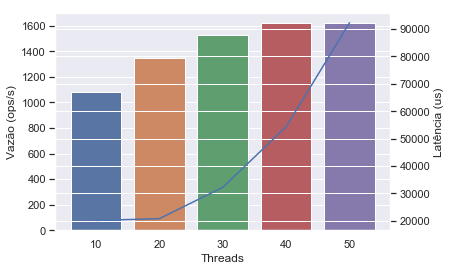

In [272]:
# Geração de gráfico

mean_df = pd.DataFrame(mean_data, columns = ['Threads', 'Throughput', 'Latency']) 
median_df = pd.DataFrame(median_data, columns = ['Threads', 'Throughput', 'Latency']) 
std_df = pd.DataFrame(std_data, columns = ['Threads', 'Throughput', 'Latency']) 
display(mean_df)
display(median_df)
display(std_df)
ax = sns.barplot(x="Threads", y="Throughput", data=mean_df)
ax.set(xlabel='Threads', ylabel='Vazão (ops/s)')
ax2 = plt.twinx()
ax2.set(ylabel="Latência (us)")
fig = sns.lineplot(data=mean_df.Latency, ax=ax2)